In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
pre_location = '/Users/oscar/Library/CloudStorage/OneDrive-Personal/Documents/PERSONAL/Finance/Competition/IMC Prosperity/IMC_Prosperity_Huskies/Round 5/round-5-island-data-bottle/'

trades_r4_d3 = pd.read_csv(f'{pre_location}trades_round_4_day_3_wn.csv', sep=';')
trades_r4_d2 = pd.read_csv(f'{pre_location}trades_round_4_day_2_wn.csv', sep=';')
trades_r4_d1 = pd.read_csv(f'{pre_location}trades_round_4_day_1_wn.csv', sep=';')

trades_r3_d2 = pd.read_csv(f'{pre_location}trades_round_3_day_2_wn.csv', sep=';')
trades_r3_d1 = pd.read_csv(f'{pre_location}trades_round_3_day_1_wn.csv', sep=';')

trades_r1_d0 = pd.read_csv(f'{pre_location}trades_round_1_day_0_wn.csv', sep=';')
trades_r1_d_1 = pd.read_csv(f'{pre_location}trades_round_1_day_-1_wn.csv', sep=';')
trades_r1_d_2 = pd.read_csv(f'{pre_location}trades_round_1_day_-2_wn.csv', sep=';')

last_timestamp_r4_d1 = trades_r4_d1.timestamp.iloc[-1]
last_timestamp_r4_d2 = trades_r4_d2.timestamp.iloc[-1]
last_timestamp_r4_d3 = trades_r4_d3.timestamp.iloc[-1]

last_timestamp_r3_d1 = trades_r3_d1.timestamp.iloc[-1]
last_timestamp_r3_d2 = trades_r3_d2.timestamp.iloc[-1]

last_timestamp_r1_d0 = trades_r1_d0.timestamp.iloc[-1]
last_timestamp_r1_d_1 = trades_r1_d_1.timestamp.iloc[-1]
last_timestamp_r1_d_2 = trades_r1_d_2.timestamp.iloc[-1]

In [10]:
trades_r4_d1.timestamp = trades_r4_d1.timestamp 
trades_r4_d2.timestamp = trades_r4_d2.timestamp + last_timestamp_r4_d1
trades_r4_d3.timestamp = trades_r4_d3.timestamp + last_timestamp_r4_d1 + last_timestamp_r4_d2
trades_r4 = pd.concat([trades_r4_d1, trades_r4_d2, trades_r4_d3]).reset_index(drop=True)

trades_r3_d1.timestamp = trades_r3_d1.timestamp
trades_r3_d2.timestamp = trades_r3_d2.timestamp + last_timestamp_r3_d1
trades_r3 = pd.concat([trades_r3_d1, trades_r3_d2]).reset_index(drop=True)

trades_r1_d_2.timestamp = trades_r1_d_2.timestamp
trades_r1_d_1.timestamp = trades_r1_d_1.timestamp + last_timestamp_r1_d_2
trades_r1_d0.timestamp = trades_r1_d0.timestamp + last_timestamp_r1_d_1 + last_timestamp_r1_d_2
trades_r1 = pd.concat([trades_r1_d_2, trades_r1_d_1, trades_r1_d0]).reset_index(drop=True)

all_traders = np.append(trades_r4.seller.values, trades_r4.buyer.values)
all_traders = np.append(all_traders, trades_r3.seller.values)
all_traders = np.append(all_traders, trades_r3.buyer.values)
all_traders = np.append(all_traders, trades_r3_d1.seller.values)
all_traders = np.append(all_traders, trades_r1.seller.values)
all_traders = np.unique(np.append(all_traders, trades_r1.buyer.values))


In [11]:
trades_SF = trades_r1[trades_r1['symbol'] == 'STARFRUIT']
trades_A = trades_r1[trades_r1['symbol'] == 'AMETHYSTS']

trades_C = trades_r3[trades_r3['symbol'] == 'CHOCOLATE']
trades_S = trades_r3[trades_r3['symbol'] == 'STRAWBERRIES']
trades_GB = trades_r3[trades_r3['symbol'] == 'GIFT_BASKET']
trades_R = trades_r3[trades_r3['symbol'] == 'ROSES']

trades_COCO = trades_r4[trades_r4['symbol'] == 'COCONUT']
trades_CC = trades_r4[trades_r4['symbol'] == 'COCONUT_COUPON']


In [5]:
def p_and_l(trades, trader):
    # Assuming 'trades' is your DataFrame and 'trader' is defined
    n = len(trades)
    Returns = np.zeros(n)
    timestamps = np.zeros(n)  # Using appropriate NumPy dtype for timestamps

    # Loop through the rows of the trades DataFrame
    i = 0
    for index, row in trades.copy().iterrows():
        timestamp = row["timestamp"]
        price = row["price"]
        quantity = row["quantity"]

        # Check if the trader is the seller
        if row["seller"] == trader:
            Returns[i] = -price * quantity
        else:
            Returns[i] = price * quantity
        
        timestamps[i] = timestamp
        i += 1

    # Remove unused elements if 'i' is less than 'n'
    Returns = Returns[:i]
    timestamps = timestamps[:i]

    # Create a DataFrame from the returns and timestamps
    returns_df = pd.DataFrame({
        'timestamp': timestamps,
        'returns': Returns
    })

    # Calculate the cumulative sum of returns and add it as a 'portfolio' column
    returns_df['portfolio'] = returns_df['returns'].cumsum()

    return returns_df


In [15]:
def get_trader_performance (trader, return_all=False):
    trades_t_SF = trades_SF.copy()[(trades_SF.seller == trader) | (trades_SF.buyer == trader)]
    trades_t_A = trades_A.copy()[(trades_A.seller == trader) | (trades_A.buyer == trader)]

    trades_t_C = trades_C.copy()[(trades_C.seller == trader) | (trades_C.buyer == trader)]
    trades_t_S = trades_S.copy()[(trades_S.seller == trader) | (trades_S.buyer == trader)]
    trades_t_GB = trades_GB.copy()[(trades_GB.seller == trader) | (trades_GB.buyer == trader)]
    trades_t_R = trades_R.copy()[(trades_R.seller == trader) | (trades_R.buyer == trader)]

    trades_t_COCO = trades_COCO.copy()[(trades_COCO.seller == trader) | (trades_COCO.buyer == trader)]
    trades_t_CC = trades_CC.copy()[(trades_CC.seller == trader) | (trades_CC.buyer == trader)]

    pnl_SF = p_and_l(trades_t_SF, trader)
    pnl_A = p_and_l(trades_t_A, trader)

    pnl_C = p_and_l(trades_t_C, trader)
    pnl_S = p_and_l(trades_t_S, trader)
    pnl_GB = p_and_l(trades_t_GB, trader)
    pnl_R = p_and_l(trades_t_R, trader)

    pnl_COCO = p_and_l(trades_t_COCO, trader)
    pnl_CC = p_and_l(trades_t_CC, trader)

    profit_SF = pnl_SF['returns'].sum()
    profit_A = pnl_A['returns'].sum()

    profit_C = pnl_C['returns'].sum()
    profit_S = pnl_S['returns'].sum()
    profit_GB = pnl_GB['returns'].sum()
    profit_R = pnl_R['returns'].sum()

    profit_COCO = pnl_COCO['returns'].sum()
    profit_CC = pnl_CC['returns'].sum()

    # Assuming you have a list of pnl dataframes for each symbol
    pnl_list = [pnl_SF, pnl_A, pnl_C, pnl_S, pnl_GB, pnl_R, pnl_COCO, pnl_CC]
    symbols = ['STARFRUIT', 'AMETHYSTS', 'CHOCOLATE', 'STRAWBERRIES', 'GIFT_BASKET', 'ROSES', 'COCONUT', 'COCONUT_COUPON']

    # Initialize dictionaries to store results
    stdevs = {}
    sharpe_ratios = {}

    for pnl, symbol in zip(pnl_list, symbols):

            # Calculate returns by dividing each portfolio change by the previous portfolio value
            pnl['returns'] = pnl['returns'] / pnl['portfolio'].shift(1)
            # Calculate standard deviation of returns
            stdev = pnl['returns'].std()
            stdevs[symbol] = stdev
            
            # Calculate mean of returns
            mean_returns = pnl['returns'].mean()
            
            # Compute Sharpe ratio, check for division by zero
            sharpe = mean_returns / stdev if stdev else 0
            sharpe_ratios[symbol] = sharpe

    profits = {
        'STARFRUIT': profit_SF,
        'AMETHYSTS': profit_A,
        'CHOCOLATE': profit_C,
        'STRAWBERRIES': profit_S,
        'GIFT_BASKET': profit_GB,
        'ROSES': profit_R,
        'COCONUT': profit_COCO,
        'COCONUT_COUPON': profit_CC
    }

    trader_df = pd.DataFrame({
        'trader': [trader] * len(stdevs),
        'symbol': list(stdevs.keys()),
        'profits' : list(profits.values()),
        'stdev': list(stdevs.values()),
        'sharpe': list(sharpe_ratios.values())
    })
    if return_all:
        return trader_df, pnl_SF, pnl_A, pnl_C, pnl_S, pnl_GB, pnl_R, pnl_COCO, pnl_CC
    else:
        return trader_df

In [16]:
trader_df = get_trader_performance('Valentina')

In [17]:
# Initialize a DataFrame to store all results
all_traders_performance = pd.DataFrame()

# Iterate over each trader and calculate their performance
for trader in all_traders:
    trader_performance = get_trader_performance(trader)
    all_traders_performance = pd.concat([all_traders_performance, trader_performance], ignore_index=True)
    print(trader_performance)


  trader          symbol   profits     stdev    sharpe
0   Adam       STARFRUIT  336004.0  9.432345 -0.032634
1   Adam       AMETHYSTS  -38032.0  4.721072  0.044321
2   Adam       CHOCOLATE       0.0       NaN       NaN
3   Adam    STRAWBERRIES       0.0       NaN       NaN
4   Adam     GIFT_BASKET       0.0       NaN       NaN
5   Adam           ROSES       0.0       NaN       NaN
6   Adam         COCONUT       0.0       NaN       NaN
7   Adam  COCONUT_COUPON       0.0       NaN       NaN
   trader          symbol   profits     stdev    sharpe
0  Amelia       STARFRUIT  848368.0  3.977020 -0.050413
1  Amelia       AMETHYSTS  921556.0  4.628782 -0.019502
2  Amelia       CHOCOLATE       0.0       NaN       NaN
3  Amelia    STRAWBERRIES       0.0       NaN       NaN
4  Amelia     GIFT_BASKET       0.0       NaN       NaN
5  Amelia           ROSES       0.0       NaN       NaN
6  Amelia         COCONUT       0.0       NaN       NaN
7  Amelia  COCONUT_COUPON       0.0       NaN       NaN
 

/opt/anaconda3/envs/analysis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


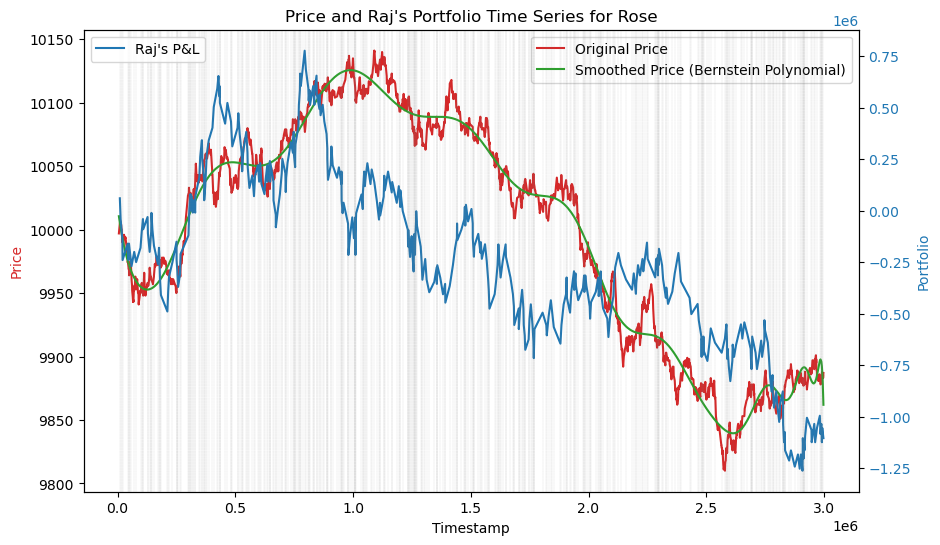

In [37]:
trader = 'Raj'
trader_df, pnl_SF, pnl_A, pnl_C, pnl_S, pnl_GB, pnl_R, pnl_COCO, pnl_CC = get_trader_performance (trader=trader, return_all=True)

trades = trades_COCO
pnl = pnl_COCO
text = 'Rose'

if True:
    # Normalize the timestamps to the range [0,1]
    t_min = trades['timestamp'].min()
    t_max = trades['timestamp'].max()
    normalized_times = (trades['timestamp'] - t_min) / (t_max - t_min)

    # Choose the degree of the polynomial (e.g., n=5 for a simple example)
    n = 50
    coefficients = np.polyfit(normalized_times, trades['price'], n)
    bernstein_polynomial = np.poly1d(coefficients)

    # Compute the polynomial prices
    smooth_prices = bernstein_polynomial(normalized_times)

    # De-normalize times for plotting (optional if you just use the normalized ones for x-axis in plotting)
    times_plot = trades['timestamp']


    # Create a new figure and axis object
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plotting the trade prices on the first y-axis
    color = 'tab:red'


    # Plotting the original trade prices
    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel('Price', color='tab:red')
    ax1.plot(times_plot, trades['price'], color='tab:red', label='Original Price')
    ax1.tick_params(axis='y')

    # Plotting the smoothed prices
    ax1.plot(times_plot, smooth_prices, color='tab:green', label='Smoothed Price (Bernstein Polynomial)')
    ax1.legend()


    # Create a second y-axis for the portfolio values
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Portfolio', color=color)
    ax2.plot(pnl['timestamp'], pnl['portfolio'], color=color, label=f"{trader}'s P&L")
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend()

    # Adding vertical bars at each timestamp in pnl
    for ts in pnl['timestamp']:
        plt.axvline(x=ts, color='gray', linestyle='--', linewidth=0.1)

    # Adding title and showing the plot
    plt.title(f"Price and {trader}'s Portfolio Time Series for {text}")
    plt.show()
    